To copy this template: File -> Save a Copy in Drive

***DISCLAIMER**: In case of any discrepancy in the assignment instruction, please refer to the `PDF` document.*

# Problem 2 - Precision, Recall, ROC

## 2.1

**Answer:**
The ROC curve plots true positive vs false positive rate at different thresholds. $\text{True positive rate} = \frac{tp}{tp + fn}$ while $\text{False positive rate} = \frac{fp}{fp + tn}$. Since false positive rate is affected by true negatives, true negatives matter for the ROC curve. The PR curve plots precision vs recall. $\text{Precision} = \frac{tp}{tp + fp}$ while $\text{Recall} = \frac{tp}{tp + fn}$. Since neither precision nor recall are affected by true negatives, it doesn't matter for the PR curve. Each point on the ROC curve corresponds to a specific decision threshold. Changing this threshold (a different point on the ROC curve) will affect the number of true positives, false positives, true negatives, and false negatives. Once these 4 values change, the precision and recall values will change. Thus for each threshold, there is a unique pair of precision and recall values and as a result a unique point on the PR curve.

## 2.2

**Link to dataset:**
https://www.openml.org/search?type=data&status=active&sort=runs&qualities.NumberOfClasses=%3D_2&id=37

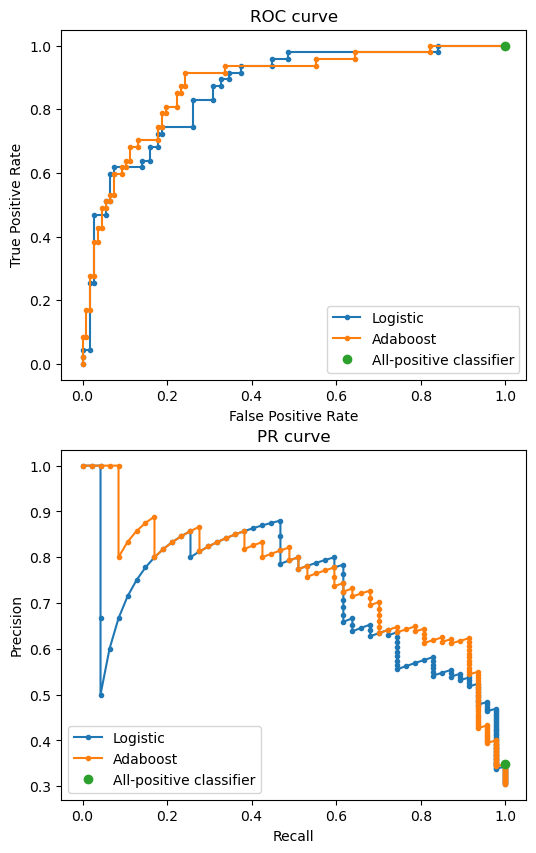

In [21]:
# your code starts here
# your code starts here
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

dataset = fetch_openml(data_id=37, parser='auto')

# Store the feature data
X = dataset.data
# store the target data
y = pd.get_dummies(dataset.target, drop_first=True, dtype=int).iloc[:, 0]
# split the data using Scikit-Learn's train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle= True)

from sklearn.linear_model import LogisticRegression

# Instantiate a logistic regression model, set the max_iter to 3000
logreg = LogisticRegression(max_iter=3000)
# fit the logreg instance to the dataset
logreg.fit(X_train, y_train)
logreg_test_probs = logreg.predict_proba(X_test)[:,1]

from sklearn.ensemble import AdaBoostClassifier

adab = AdaBoostClassifier(n_estimators=100, random_state=0)
adab.fit(X_train, y_train)
adab_test_probs = adab.predict_proba(X_test)[:,1]

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize=(6, 10))

from sklearn.metrics import roc_curve, precision_recall_curve

plt.sca(axs[0])

lr_fpr, lr_tpr, thresholds = roc_curve(y_test, logreg_test_probs)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

ad_fpr, ad_tpr, thresholds = roc_curve(y_test, adab_test_probs)
plt.plot(ad_fpr, ad_tpr, marker='.', label='Adaboost')

plt.plot(1, 1, 'o', label='All-positive classifier')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.title('ROC curve')

plt.sca(axs[1])

precision, recall, thresholds = precision_recall_curve(y_test, logreg_test_probs)
plt.plot(recall, precision, marker='.', label='Logistic')

precision, recall, thresholds = precision_recall_curve(y_test, adab_test_probs)
plt.plot(recall, precision, marker='.', label='Adaboost')

plt.plot(1, np.mean(y), 'o', label='All-positive classifier')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc='lower left')
plt.title('PR curve')

plt.show()


**Answer:**
The all-positive classifier will always have 100% true positive rate and 100% false positive rate. It has 100% true positive rate, or recall, since it classifies everything as positive and thus will correctly classify all positives and no negatives thus no false negatives. It has 100% false positive rate since it has no negatives and thus no true negatives. The precision of an all-positive classifier is equal to the proportion of the dataset which is positive, as all data will either be true positive or false positive (since everything is classified as positive) and the denominator is the size of the dataset while the numerator is the number of true positives.